# Interactive Pathfinding Algorithm Visualizer

This Jupyter Notebook is a complete, self-contained guide to creating and understanding an advanced pathfinding visualizer. We will explore not only the classic A* algorithm but also state-of-the-art optimizations like Jump Point Search, any-angle pathfinding with Theta*, and powerful analysis tools.

## 1. Setup

First, we need to ensure you have the necessary libraries installed. We now require **`pygame`** for the visualization and **`matplotlib`** for the data analysis suite.

In [1]:
!pip install pygame matplotlib

Defaulting to user installation because normal site-packages is not writeable


## 2. The Grid: Our Digital World

The foundation of our project is the `Grid` class, which manages a 2D world of `Node` objects.

### 2.1 The `Node` Class (with Terrain)

Each `Node` represents a single point on our grid. We have upgraded it to understand that not all terrain is equal.

-   **`terrain_cost`:** A multiplier for the cost of moving onto this node. A value of `1` is a normal path, `5` could be a high-cost swamp, and `0.5` could be a low-cost road.

### 2.2 The `Grid` Class (with Line of Sight & Maze Generation)

The `Grid` class holds all the nodes and has been upgraded with two powerful new methods:

-   **`line_of_sight(node1, node2)`:** Checks if there is an unobstructed straight line between two nodes. This is crucial for our any-angle algorithm, Theta*.
-   **`generate_maze()`:** Implements a **Recursive Backtracking** algorithm to instantly create a complex, perfect maze, providing an excellent test case for our algorithms.

In [2]:
import math
import random

class Node:
    def __init__(self, row, col, is_obstacle=False):
        self.row, self.col = row, col
        self.is_obstacle = is_obstacle
        self.terrain_cost = 1
        self.g_cost, self.h_cost, self.f_cost = float('inf'), float('inf'), float('inf')
        self.parent = None
    def __repr__(self): return f"Node({self.row}, {self.col})"
    def __lt__(self, other): return self.f_cost < other.f_cost
    def set_obstacle(self, is_obstacle=True): self.is_obstacle = is_obstacle
    def set_terrain(self, cost): self.terrain_cost = cost
    def reset(self):
        self.g_cost, self.h_cost, self.f_cost = float('inf'), float('inf'), float('inf')
        self.parent = None

class Grid:
    def __init__(self, rows, cols):
        self.rows, self.cols = rows, cols
        self.grid = self._create_grid()
    def _create_grid(self):
        return [[Node(i, j) for j in range(self.cols)] for i in range(self.rows)]
    def get_node(self, row, col):
        if 0 <= row < self.rows and 0 <= col < self.cols:
            return self.grid[row][col]
        return None
    def get_neighbors(self, node):
        neighbors = []
        for dr in [-1, 0, 1]:
            for dc in [-1, 0, 1]:
                if dr == 0 and dc == 0: continue
                r, c = node.row + dr, node.col + dc
                neighbor_node = self.get_node(r, c)
                if neighbor_node and not neighbor_node.is_obstacle:
                    neighbors.append(neighbor_node)
        return neighbors
    def reset_pathfinding_data(self):
        for row in self.grid:
            for node in row: node.reset()
    def line_of_sight(self, node1, node2):
        x0, y0 = node1.col, node1.row; x1, y1 = node2.col, node2.row
        dx, dy = abs(x1 - x0), abs(y1 - y0)
        x, y = x0, y0
        sx = 1 if x0 < x1 else -1; sy = 1 if y0 < y1 else -1
        err = dx - dy
        while True:
            node = self.get_node(y, x)
            if node is None or node.is_obstacle: return False
            if x == x1 and y == y1: break
            e2 = 2 * err
            if e2 > -dy: err -= dy; x += sx
            if e2 < dx: err += dx; y += sy
        return True
    def generate_maze(self):
        for row in self.grid:
            for node in row:
                node.set_obstacle(True); node.set_terrain(1)
        stack = []
        start_node = self.get_node(0, 0)
        start_node.set_obstacle(False)
        stack.append(start_node)
        while stack:
            current_node = stack[-1]
            r, c = current_node.row, current_node.col
            neighbors = []
            for dr, dc in [(0, 2), (0, -2), (2, 0), (-2, 0)]:
                nr, nc = r + dr, c + dc
                neighbor = self.get_node(nr, nc)
                if neighbor and neighbor.is_obstacle:
                    neighbors.append(neighbor)
            if neighbors:
                next_node = random.choice(neighbors)
                wall_r, wall_c = (r + next_node.row) // 2, (c + next_node.col) // 2
                self.get_node(wall_r, wall_c).set_obstacle(False)
                next_node.set_obstacle(False)
                stack.append(next_node)
            else:
                stack.pop()

## 3. The Algorithms

Our suite now includes a wide variety of algorithms, each with unique strengths.

-   **A***: The industry standard, using heuristics to find the cheapest path. Respects terrain costs.
-   **Dijkstra**: A foundational algorithm that finds the cheapest path but is "blind," exploring in all directions.
-   **Jump Point Search (JPS)**: A high-speed optimization of A* for uniform-cost grids. It "jumps" over long straight lines, exploring a fraction of the nodes. It ignores terrain costs for maximum speed.
-   **Theta***: An "any-angle" algorithm that finds shorter, more natural-looking paths by checking for line-of-sight and cutting corners.
-   **Bidirectional Search**: An optimization that searches from both the start and end simultaneously, often exploring far fewer nodes in open spaces.

## 4. Benchmarking & Visualization

A key feature of this project is its ability to perform analysis.

-   **Benchmarking Mode**: By pressing a key, the application will run all algorithms on the current map without visualization to measure pure performance.
-   **Data Visualization**: After the benchmark, a new window will appear with professional bar charts generated by `matplotlib`, comparing each algorithm's performance on three key metrics:
    1.  **Execution Time (ms)**
    2.  **Path Length**
    3.  **Nodes Explored**

## 5. The Final Application

The cell below contains the complete, final application with all features integrated. Running this cell will launch the interactive Pygame window.

### Controls:
-   **Mouse Left:** Place Start, then End, then draw Obstacles.
-   **Mouse Right:** Erase nodes.
-   **`C` key:** Clear the grid to an empty state.
-   **`M` key:** Generate a new, random maze.
-   **`SPACE` key:** Run the currently selected algorithm visually.
-   **`X` key:** Run the benchmark on the current map and show performance charts.

### Algorithm Selection:
-   **`A`**: A* Search
-   **`D`**: Dijkstra's Algorithm
-   **`W`**: Weighted A*
-   **`J`**: Jump Point Search (JPS)
-   **`T`**: Theta* (Any-Angle)
-   **`B`**: Bidirectional Search

### Terrain Painting:
-   **Hold `1` + Drag Mouse:** Paint high-cost "Swamp" tiles.
-   **Hold `2` + Drag Mouse:** Paint low-cost "Road" tiles.
-   **Hold `0` + Drag Mouse:** Erase terrain back to normal.

pygame 2.6.1 (SDL 2.28.4, Python 3.13.7)
Hello from the pygame community. https://www.pygame.org/contribute.html

               BENCHMARK RESULTS
Algorithm       | Time (ms)  | Path Len   | Explored  
--------------------------------------------------
A*              | 3.763      | 53         | 114       
Dijkstra        | 19.173     | 53         | 1525      
Weighted A*     | 2.913      | 53         | 73        
Theta*          | 26.465     | 4          | 451       
Bidirectional   | 17.663     | 53         | 239       
JPS             | 4.792      | 9          | 12        


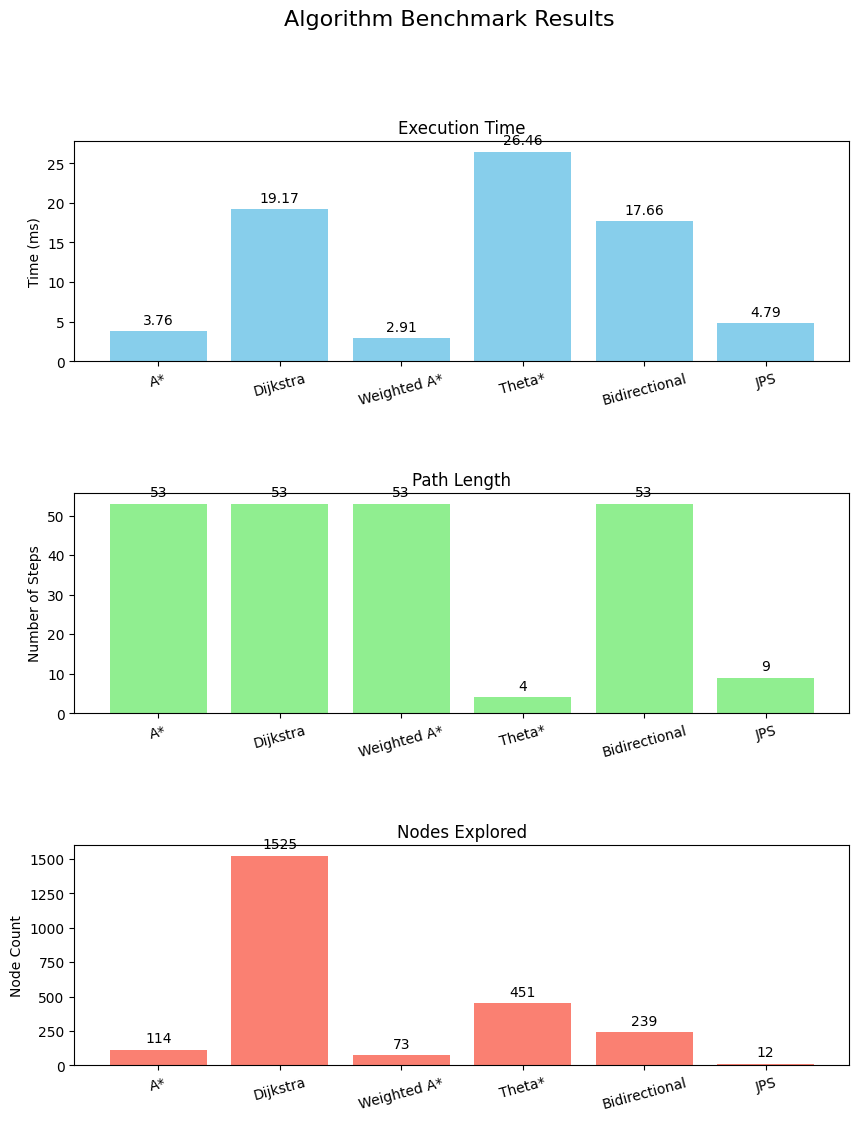

In [3]:
import pygame
import time
import matplotlib.pyplot as plt
import numpy as np
import heapq
import math
import random

# --- SECTION 1: GRID AND NODE CLASSES ---
class Node:
    def __init__(self, row, col, is_obstacle=False):
        self.row, self.col = row, col; self.is_obstacle = is_obstacle; self.terrain_cost = 1
        self.g_cost, self.h_cost, self.f_cost = float('inf'), float('inf'), float('inf'); self.parent = None
    def __repr__(self): return f"Node({self.row}, {self.col})"
    def __lt__(self, other): return self.f_cost < other.f_cost
    def set_obstacle(self, is_obstacle=True): self.is_obstacle = is_obstacle
    def set_terrain(self, cost): self.terrain_cost = cost
    def reset(self): self.g_cost, self.h_cost, self.f_cost = float('inf'), float('inf'), float('inf'); self.parent = None

class Grid:
    def __init__(self, rows, cols):
        self.rows, self.cols = rows, cols; self.grid = [[Node(i, j) for j in range(cols)] for i in range(rows)]
    def get_node(self, row, col):
        if 0 <= row < self.rows and 0 <= col < self.cols: return self.grid[row][col]
    def get_neighbors(self, node):
        neighbors = []
        for dr in [-1, 0, 1]:
            for dc in [-1, 0, 1]:
                if dr == 0 and dc == 0: continue
                neighbor_node = self.get_node(node.row + dr, node.col + dc)
                if neighbor_node and not neighbor_node.is_obstacle: neighbors.append(neighbor_node)
        return neighbors
    def reset_pathfinding_data(self):
        for row in self.grid:
            for node in row: node.reset()
    def line_of_sight(self, n1, n2):
        x0, y0 = n1.col, n1.row; x1, y1 = n2.col, n2.row; dx, dy = abs(x1 - x0), abs(y1 - y0)
        x, y = x0, y0; sx = 1 if x0 < x1 else -1; sy = 1 if y0 < y1 else -1; err = dx - dy
        while True:
            node = self.get_node(y, x)
            if not node or node.is_obstacle: return False
            if x == x1 and y == y1: break
            e2 = 2 * err
            if e2 > -dy: err -= dy; x += sx
            if e2 < dx: err += dx; y += sy
        return True
    def generate_maze(self):
        for row in self.grid:
            for node in row: node.set_obstacle(True); node.set_terrain(1)
        stack = []; start_node = self.get_node(0, 0); start_node.set_obstacle(False); stack.append(start_node)
        while stack:
            r, c = stack[-1].row, stack[-1].col; neighbors = []
            for dr, dc in [(0, 2), (0, -2), (2, 0), (-2, 0)]:
                neighbor = self.get_node(r + dr, c + dc)
                if neighbor and neighbor.is_obstacle: neighbors.append(neighbor)
            if neighbors:
                next_node = random.choice(neighbors)
                self.get_node((r + next_node.row) // 2, (c + next_node.col) // 2).set_obstacle(False)
                next_node.set_obstacle(False); stack.append(next_node)
            else: stack.pop()

# --- SECTION 2: ALGORITHM IMPLEMENTATIONS ---
def _heuristic(node_a, node_b): return abs(node_a.row - node_b.row) + abs(node_a.col - node_b.col)
def _get_distance(node_a, node_b): return math.sqrt((node_a.row - node_b.row)**2 + (node_a.col - node_b.col)**2)
def _reconstruct_path(end_node):
    path = []; current_node = end_node
    while current_node is not None: path.append(current_node); current_node = current_node.parent
    return path[::-1]
def a_star_search(draw_callback, grid, start_node, end_node, weight=1.0):
    grid.reset_pathfinding_data(); open_set_heap = []; open_set_hash = {start_node}; closed_set = set()
    start_node.g_cost = 0; start_node.h_cost = _heuristic(start_node, end_node); start_node.f_cost = start_node.g_cost + (start_node.h_cost * weight)
    heapq.heappush(open_set_heap, (start_node.f_cost, start_node))
    while open_set_heap:
        if draw_callback:
            for event in pygame.event.get():
                if event.type == pygame.QUIT: pygame.quit(); return False, {}, 0
        _, current_node = heapq.heappop(open_set_heap); open_set_hash.remove(current_node)
        if current_node == end_node: return True, _reconstruct_path(end_node), len(closed_set)
        for neighbor in grid.get_neighbors(current_node):
            if neighbor in closed_set: continue
            step_cost = _get_distance(current_node, neighbor) * neighbor.terrain_cost
            tentative_g_cost = current_node.g_cost + step_cost
            if tentative_g_cost < neighbor.g_cost:
                neighbor.parent = current_node; neighbor.g_cost = tentative_g_cost; neighbor.h_cost = _heuristic(neighbor, end_node)
                neighbor.f_cost = neighbor.g_cost + (neighbor.h_cost * weight)
                if neighbor not in open_set_hash: heapq.heappush(open_set_heap, (neighbor.f_cost, neighbor)); open_set_hash.add(neighbor)
        if draw_callback: draw_callback(open_set=open_set_hash, closed_set=closed_set)
        if current_node != start_node: closed_set.add(current_node)
    return False, {}, len(closed_set)
def dijkstra_search(draw_callback, grid, start_node, end_node): return a_star_search(draw_callback, grid, start_node, end_node, weight=0.0)
def weighted_a_star_search(draw_callback, grid, start_node, end_node): return a_star_search(draw_callback, grid, start_node, end_node, weight=1.5)
def _is_walkable(grid, row, col): node = grid.get_node(row, col); return node is not None and not node.is_obstacle
def _identify_successors(grid, current_node, start_node, end_node):
    successors, neighbors, parent = [], [], current_node.parent; r, c = current_node.row, current_node.col
    if parent is None:
        for dr in [-1,0,1]:
            for dc in [-1,0,1]:
                if dr==0 and dc==0: continue
                if _is_walkable(grid, r+dr, c+dc): neighbors.append((dr,dc))
    else:
        pr, pc = parent.row, parent.col; dr, dc = (r - pr) // max(1, abs(r-pr)), (c - pc) // max(1, abs(c-pc))
        if dr != 0 and dc != 0:
            if _is_walkable(grid, r, c+dc): neighbors.append((0,dc))
            if _is_walkable(grid, r+dr, c): neighbors.append((dr,0))
            if _is_walkable(grid, r, c+dc) or _is_walkable(grid, r+dr,c):
                if _is_walkable(grid, r+dr, c+dc): neighbors.append((dr,dc))
            if not _is_walkable(grid, r, c-dc) and _is_walkable(grid, r+dr, c-dc): neighbors.append((dr,-dc))
            if not _is_walkable(grid, r-dr, c) and _is_walkable(grid, r-dr, c+dc): neighbors.append((-dr,dc))
        else:
            if dr == 0:
                if _is_walkable(grid, r, c+dc):
                    neighbors.append((0,dc))
                    if not _is_walkable(grid, r+1, c): neighbors.append((1,dc))
                    if not _is_walkable(grid, r-1, c): neighbors.append((-1,dc))
            else:
                if _is_walkable(grid, r+dr, c):
                    neighbors.append((dr,0))
                    if not _is_walkable(grid, r, c+1): neighbors.append((dr,1))
                    if not _is_walkable(grid, r, c-1): neighbors.append((dr,-1))
    for dr, dc in neighbors:
        jump_point = _jump(grid, r, c, dr, dc, start_node, end_node)
        if jump_point: successors.append(jump_point)
    return successors
def _jump(grid, r, c, dr, dc, start_node, end_node):
    nr, nc = r+dr, c+dc
    if not _is_walkable(grid, nr, nc): return None
    neighbor_node = grid.get_node(nr, nc)
    if neighbor_node == end_node: return neighbor_node
    if dr!=0 and dc!=0:
        if (not _is_walkable(grid, nr-dr, nc) and _is_walkable(grid, nr-dr, nc+dc)) or \
           (not _is_walkable(grid, nr, nc-dc) and _is_walkable(grid, nr+dr, nc-dc)): return neighbor_node
    else:
        if dr!=0:
            if (not _is_walkable(grid, nr, nc+1) and _is_walkable(grid, nr+dr, nc+1)) or \
               (not _is_walkable(grid, nr, nc-1) and _is_walkable(grid, nr+dr, nc-1)): return neighbor_node
        else:
            if (not _is_walkable(grid, nr+1, nc) and _is_walkable(grid, nr+1, nc+dc)) or \
               (not _is_walkable(grid, nr-1, nc) and _is_walkable(grid, nr-1, nc+dc)): return neighbor_node
    if dr!=0 and dc!=0:
        if _jump(grid, nr, nc, dr, 0, start_node, end_node) or _jump(grid, nr, nc, 0, dc, start_node, end_node): return neighbor_node
    return _jump(grid, nr, nc, dr, dc, start_node, end_node)
def jps_search(draw_callback, grid, start_node, end_node):
    grid.reset_pathfinding_data(); open_set_heap = []; open_set_hash = {start_node}; closed_set = set()
    start_node.g_cost = 0; start_node.h_cost = _heuristic(start_node, end_node); start_node.f_cost = start_node.g_cost + start_node.h_cost
    heapq.heappush(open_set_heap, (start_node.f_cost, start_node))
    while open_set_heap:
        if draw_callback:
            for event in pygame.event.get():
                if event.type == pygame.QUIT: pygame.quit(); return False, {}, 0
        _, current_node = heapq.heappop(open_set_heap); open_set_hash.remove(current_node)
        if current_node == end_node: return True, _reconstruct_path(end_node), len(closed_set)
        closed_set.add(current_node)
        successors = _identify_successors(grid, current_node, start_node, end_node)
        for successor in successors:
            if successor in closed_set: continue
            tentative_g_cost = current_node.g_cost + _get_distance(current_node, successor)
            if tentative_g_cost < successor.g_cost:
                successor.parent = current_node; successor.g_cost = tentative_g_cost; successor.h_cost = _heuristic(successor, end_node)
                successor.f_cost = successor.g_cost + successor.h_cost
                if successor not in open_set_hash: heapq.heappush(open_set_heap, (successor.f_cost, successor)); open_set_hash.add(successor)
        if draw_callback: draw_callback(open_set=open_set_hash, closed_set=closed_set)
    return False, {}, len(closed_set)
def theta_star_search(draw_callback, grid, start_node, end_node, weight=1.0):
    grid.reset_pathfinding_data(); open_set_heap = []; open_set_hash = {start_node}; closed_set = set()
    start_node.g_cost = 0; start_node.h_cost = _get_distance(start_node, end_node); start_node.f_cost = start_node.g_cost + (start_node.h_cost * weight)
    heapq.heappush(open_set_heap, (start_node.f_cost, start_node))
    while open_set_heap:
        if draw_callback:
            for event in pygame.event.get():
                if event.type == pygame.QUIT: pygame.quit(); return False, {}, 0
        _, current_node = heapq.heappop(open_set_heap); open_set_hash.remove(current_node)
        if current_node == end_node: return True, _reconstruct_path(end_node), len(closed_set)
        closed_set.add(current_node)
        for neighbor in grid.get_neighbors(current_node):
            if neighbor in closed_set: continue
            parent = current_node.parent
            if parent is not None and grid.line_of_sight(parent, neighbor):
                tentative_g_cost = parent.g_cost + _get_distance(parent, neighbor)
                if tentative_g_cost < neighbor.g_cost:
                    neighbor.parent = parent; neighbor.g_cost = tentative_g_cost; neighbor.h_cost = _get_distance(neighbor, end_node)
                    neighbor.f_cost = neighbor.g_cost + (neighbor.h_cost * weight)
                    if neighbor not in open_set_hash: heapq.heappush(open_set_heap, (neighbor.f_cost, neighbor)); open_set_hash.add(neighbor)
            else:
                step_cost = _get_distance(current_node, neighbor) * neighbor.terrain_cost
                tentative_g_cost = current_node.g_cost + step_cost
                if tentative_g_cost < neighbor.g_cost:
                    neighbor.parent = current_node; neighbor.g_cost = tentative_g_cost; neighbor.h_cost = _get_distance(neighbor, end_node)
                    neighbor.f_cost = neighbor.g_cost + (neighbor.h_cost * weight)
                    if neighbor not in open_set_hash: heapq.heappush(open_set_heap, (neighbor.f_cost, neighbor)); open_set_hash.add(neighbor)
        if draw_callback: draw_callback(open_set=open_set_hash, closed_set=closed_set)
    return False, {}, len(closed_set)
def _reconstruct_bidirectional_path(meeting_node, start_node, end_node, parent_map_fwd, parent_map_bwd):
    path_fwd = []; current = meeting_node
    while current != start_node: path_fwd.append(current); current = parent_map_fwd[current]
    path_fwd.append(start_node); path_fwd.reverse()
    path_bwd = []; current = meeting_node
    while current != end_node: path_bwd.append(current); current = parent_map_bwd[current]
    path_bwd.append(end_node)
    return path_fwd + path_bwd[1:]
def bidirectional_search(draw_callback, grid, start_node, end_node, weight=1.0):
    grid.reset_pathfinding_data(); open_set_fwd, closed_set_fwd = {start_node}, set(); g_cost_fwd = {n: float('inf') for r in grid.grid for n in r}; g_cost_fwd[start_node] = 0; parent_map_fwd = {}
    open_set_bwd, closed_set_bwd = {end_node}, set(); g_cost_bwd = {n: float('inf') for r in grid.grid for n in r}; g_cost_bwd[end_node] = 0; parent_map_bwd = {}
    while open_set_fwd and open_set_bwd:
        if draw_callback:
            for event in pygame.event.get():
                if event.type == pygame.QUIT: pygame.quit(); return False, {}, 0
        current_fwd = min(open_set_fwd, key=lambda n: g_cost_fwd[n] + _heuristic(n, end_node) * weight); open_set_fwd.remove(current_fwd); closed_set_fwd.add(current_fwd)
        if current_fwd in closed_set_bwd:
            path = _reconstruct_bidirectional_path(current_fwd, start_node, end_node, parent_map_fwd, parent_map_bwd)
            return True, path, len(closed_set_fwd) + len(closed_set_bwd)
        for neighbor in grid.get_neighbors(current_fwd):
            if neighbor in closed_set_fwd: continue
            step_cost = _get_distance(current_fwd, neighbor) * neighbor.terrain_cost; tentative_g_cost = g_cost_fwd[current_fwd] + step_cost
            if tentative_g_cost < g_cost_fwd[neighbor]: parent_map_fwd[neighbor] = current_fwd; g_cost_fwd[neighbor] = tentative_g_cost; open_set_fwd.add(neighbor)
        current_bwd = min(open_set_bwd, key=lambda n: g_cost_bwd[n] + _heuristic(n, start_node) * weight); open_set_bwd.remove(current_bwd); closed_set_bwd.add(current_bwd)
        if current_bwd in closed_set_fwd:
            path = _reconstruct_bidirectional_path(current_bwd, start_node, end_node, parent_map_fwd, parent_map_bwd)
            return True, path, len(closed_set_fwd) + len(closed_set_bwd)
        for neighbor in grid.get_neighbors(current_bwd):
            if neighbor in closed_set_bwd: continue
            step_cost = _get_distance(current_bwd, neighbor) * neighbor.terrain_cost; tentative_g_cost = g_cost_bwd[current_bwd] + step_cost
            if tentative_g_cost < g_cost_bwd[neighbor]: parent_map_bwd[neighbor] = current_bwd; g_cost_bwd[neighbor] = tentative_g_cost; open_set_bwd.add(neighbor)
        if draw_callback: draw_callback(open_set_fwd, closed_set_fwd, open_set_bwd, closed_set_bwd)
    return False, {}, len(closed_set_fwd) + len(closed_set_bwd)

# --- SECTION 3: APPLICATION WRAPPER ---
def main_app():
    pygame.init()
    WIDTH, HEIGHT = 600, 720
    WIN = pygame.display.set_mode((WIDTH, HEIGHT))
    pygame.display.set_caption("Pathfinding Visualizer")
    FONT = pygame.font.SysFont('arial', 18); SMALL_FONT = pygame.font.SysFont('arial', 14)
    
    WHITE, BLACK, GREY = (255, 255, 255), (0, 0, 0), (128, 128, 128); GREEN, RED, BLUE = (0, 255, 0), (255, 0, 0), (64, 200, 224)
    TURQUOISE, ORANGE = (175, 238, 238), (255, 215, 180); ORANGE_FWD, ORANGE_BWD = (255, 200, 100), (255, 150, 50)
    SWAMP_GREEN, ROAD_YELLOW = (52, 84, 46), (214, 201, 142)

    def get_clicked_pos(pos, rows, width):
        gap = width // rows; x, y = pos
        if y >= width: return -1, -1
        return y // gap, x // gap
    
    def draw_nodes(win, grid_obj, rows, width, start_node=None, end_node=None, open_set=None, closed_set=None, path=None, open_set_bwd=None, closed_set_fwd=None, closed_set_bwd=None):
        gap = width // rows; open_set, closed_set = open_set or set(), closed_set or set(); closed_set_fwd, closed_set_bwd = closed_set_fwd or set(), closed_set_bwd or set()
        open_set_bwd = open_set_bwd or set(); path = path or []
        for row in grid_obj.grid:
            for node in row:
                if node.terrain_cost == 5: color = SWAMP_GREEN
                elif node.terrain_cost == 0.5: color = ROAD_YELLOW
                else: color = WHITE
                if closed_set_fwd:
                    if node in closed_set_fwd: color = ORANGE_FWD
                    if node in closed_set_bwd: color = ORANGE_BWD
                else:
                    if node in closed_set: color = ORANGE
                if node in open_set or node in open_set_bwd: color = TURQUOISE
                if node.is_obstacle: color = BLACK
                pygame.draw.rect(win, color, (node.col * gap, node.row * gap, gap, gap))
        for node in path: pygame.draw.rect(win, BLUE, (node.col * gap, node.row * gap, gap, gap))
        if start_node: pygame.draw.rect(win, GREEN, (start_node.col * gap, start_node.row * gap, gap, gap))
        if end_node: pygame.draw.rect(win, RED, (end_node.col * gap, end_node.row * gap, gap, gap))

    def draw_grid_lines(win, rows, width):
        gap = width // rows
        for i in range(rows):
            pygame.draw.line(win, GREY, (0, i * gap), (width, i * gap))
            for j in range(rows): pygame.draw.line(win, GREY, (j * gap, 0), (j * gap, width))
            
    def draw(win, grid_obj, rows, width, **kwargs):
        win.fill(WHITE); grid_area_height = width
        algo_name = kwargs.get('algo_name', "")
        info_text_1 = FONT.render(f"Algorithm: {algo_name}", True, BLACK)
        win.blit(info_text_1, (10, grid_area_height + 5))
        if algo_name == "Jump Point Search": win.blit(SMALL_FONT.render("(NOTE: JPS ignores terrain costs)", True, RED), (info_text_1.get_width() + 15, grid_area_height + 8))
        if algo_name == "Theta* (Any-Angle)": win.blit(SMALL_FONT.render("(NOTE: Any-angle shortcuts may ignore some terrain costs)", True, (200, 100, 0)), (info_text_1.get_width() + 15, grid_area_height + 8))
        win.blit(FONT.render("C: Clear | M: Maze | X: Benchmark | SPACE: Run", True, BLACK), (10, grid_area_height + 25))
        win.blit(FONT.render("Select: A/D/W/J/T/B | Paint: 1-Swamp 2-Road 0-Erase", True, BLACK), (10, grid_area_height + 45))
        if kwargs.get('metrics'):
            metrics = kwargs.get('metrics')
            win.blit(FONT.render(f"Time: {metrics['time']:.4f}s | Path Length: {metrics['length']} | Nodes Explored: {metrics['explored']}", True, BLACK), (10, grid_area_height + 65))
        
        # CORRECTED: Filter kwargs before passing to draw_nodes
        draw_nodes_kwargs = {key: kwargs[key] for key in ['start_node', 'end_node', 'open_set', 'closed_set', 'path', 'open_set_bwd', 'closed_set_fwd', 'closed_set_bwd'] if key in kwargs}
        draw_nodes(win, grid_obj, rows, width, **draw_nodes_kwargs)
        
        draw_grid_lines(win, rows, width)

    def visualize_benchmark_results(results):
        names = list(results.keys()); times = [r['time'] for r in results.values()]; lengths = [r['path_len'] if r['path_len'] != "N/A" else 0 for r in results.values()]; explored = [r['explored'] for r in results.values()]
        fig, axs = plt.subplots(3, 1, figsize=(10, 12)); fig.suptitle('Algorithm Benchmark Results', fontsize=16, y=0.99)
        bars_time = axs[0].bar(names, times, color='skyblue'); axs[0].set_ylabel('Time (ms)'); axs[0].set_title('Execution Time'); axs[0].bar_label(bars_time, fmt='%.2f', padding=3)
        bars_len = axs[1].bar(names, lengths, color='lightgreen'); axs[1].set_ylabel('Number of Steps'); axs[1].set_title('Path Length'); axs[1].bar_label(bars_len, padding=3)
        bars_exp = axs[2].bar(names, explored, color='salmon'); axs[2].set_ylabel('Node Count'); axs[2].set_title('Nodes Explored'); axs[2].bar_label(bars_exp, padding=3)
        for ax in axs: ax.tick_params(axis='x', rotation=15)
        fig.subplots_adjust(hspace=0.6); plt.show()
    def run_benchmark(grid, start_node, end_node):
        if not start_node or not end_node: print("\n[BENCHMARK FAILED] Please set a start and end node first."); return
        algos = {"A*": a_star_search, "Dijkstra": dijkstra_search, "Weighted A*": weighted_a_star_search, "Theta*": theta_star_search, "Bidirectional": bidirectional_search, "JPS": jps_search}
        results = {}
        for name, func in algos.items():
            start_t = time.perf_counter(); found, path, explored = func(None, grid, start_node, end_node); end_t = time.perf_counter()
            results[name] = {'time': (end_t - start_t) * 1000, 'path_len': len(path) if found else "N/A", 'explored': explored}
        print("\n" + "="*50); print(" " * 15 + "BENCHMARK RESULTS"); print("="*50)
        print(f"{'Algorithm':<15} | {'Time (ms)':<10} | {'Path Len':<10} | {'Explored':<10}"); print("-"*50)
        for name, res in results.items(): print(f"{name:<15} | {res['time']:<10.3f} | {str(res['path_len']):<10} | {res['explored']:<10}")
        print("="*50); visualize_benchmark_results(results)

    GRID_WIDTH, ROWS = 600, 40; grid = Grid(ROWS, ROWS); start_node, end_node = None, None
    run = True; algorithm_func = a_star_search; algorithm_name = "A* Search"; last_metrics = None
    while run:
        draw_kwargs = {'start_node': start_node, 'end_node': end_node, 'algo_name': algorithm_name, 'metrics': last_metrics}
        if algorithm_name == "Bidirectional Search": draw_kwargs.update({'closed_set_fwd': set(), 'closed_set_bwd': set()})
        draw(WIN, grid, ROWS, GRID_WIDTH, **draw_kwargs)
        pygame.display.update()
        for event in pygame.event.get():
            if event.type == pygame.QUIT: run = False
            if pygame.mouse.get_pressed()[0]:
                keys = pygame.key.get_pressed()
                if not any(keys[k] for k in [pygame.K_1, pygame.K_2, pygame.K_0]):
                    pos = pygame.mouse.get_pos(); row, col = get_clicked_pos(pos, ROWS, GRID_WIDTH)
                    if row != -1:
                        node = grid.get_node(row, col)
                        if node and not node.is_obstacle:
                            if not start_node and node != end_node: start_node = node
                            elif not end_node and node != start_node: end_node = node
                            elif node != end_node and node != start_node: node.set_obstacle(True)
            elif pygame.mouse.get_pressed()[2]:
                pos = pygame.mouse.get_pos(); row, col = get_clicked_pos(pos, ROWS, GRID_WIDTH)
                if row != -1:
                    node = grid.get_node(row, col)
                    if node: node.set_obstacle(False);
                    if node == start_node: start_node = None
                    if node == end_node: end_node = None
            if event.type == pygame.KEYDOWN:
                key_map = {pygame.K_a: (a_star_search, "A* Search"), pygame.K_d: (dijkstra_search, "Dijkstra's Algorithm"), pygame.K_w: (weighted_a_star_search, "Weighted A* (1.5x)"),
                           pygame.K_j: (jps_search, "Jump Point Search"), pygame.K_t: (theta_star_search, "Theta* (Any-Angle)"), pygame.K_b: (bidirectional_search, "Bidirectional Search")}
                if event.key in key_map: algorithm_func, algorithm_name = key_map[event.key]
                if event.key == pygame.K_m: grid.generate_maze(); start_node, end_node, last_metrics = None, None, None
                if event.key == pygame.K_x: run_benchmark(grid, start_node, end_node)
                if event.key == pygame.K_c: grid = Grid(ROWS, ROWS); start_node, end_node, last_metrics = None, None, None
                if event.key == pygame.K_SPACE and start_node and end_node:
                    start_time = time.time()
                    def callback_handler(*args, **kwargs):
                        draw_kwargs = {'start_node': start_node, 'end_node': end_node, 'algo_name': algorithm_name}
                        if algorithm_name == "Bidirectional Search":
                            draw_kwargs.update({'open_set': args[0], 'closed_set_fwd': args[1], 'open_set_bwd': args[2], 'closed_set_bwd': args[3]})
                        else: draw_kwargs.update(kwargs)
                        draw(WIN, grid, ROWS, GRID_WIDTH, **draw_kwargs)
                        pygame.display.update()
                    found, path, total_explored = algorithm_func(callback_handler, grid, start_node, end_node)
                    end_time = time.time()
                    if found:
                        last_metrics = { "time": end_time - start_time, "length": len(path), "explored": total_explored }
                        draw(WIN, grid, ROWS, GRID_WIDTH, start_node=start_node, end_node=end_node, path=path, algo_name=algorithm_name, metrics=last_metrics)
                        pygame.display.update()
        keys = pygame.key.get_pressed(); mouse_buttons = pygame.mouse.get_pressed()
        if mouse_buttons[0]:
            pos = pygame.mouse.get_pos(); row, col = get_clicked_pos(pos, ROWS, GRID_WIDTH)
            if row != -1:
                node = grid.get_node(row, col)
                if node and node != start_node and node != end_node:
                    if keys[pygame.K_1]: node.set_terrain(5); node.set_obstacle(False)
                    elif keys[pygame.K_2]: node.set_terrain(0.5); node.set_obstacle(False)
                    elif keys[pygame.K_0]: node.set_terrain(1); node.set_obstacle(False)
    pygame.quit()

# --- Entry Point ---
try:
    main_app()
except pygame.error as e:
    print(f"Pygame window was closed or quit. Restart the cell to run again.")
except Exception as e:
    print(f"An error occurred: {e}")
    # This will help catch other errors that might kill the kernel